In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Statistical Methods


In [2]:
a = np.sqrt(np.linspace(-2, 2, 5))
a


C:\Users\cenkt\AppData\Local\Temp\ipykernel_11624\1040607804.py:1: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(np.linspace(-2, 2, 5))


array([       nan,        nan, 0.        , 1.        , 1.41421356])

In [3]:
a.min(), a.max()


(nan, nan)

In [4]:
np.nanmin(a), np.nanmax(a)


(0.0, 1.4142135623730951)

In [5]:
np.linspace(-2, 2, 4)


array([-2.        , -0.66666667,  0.66666667,  2.        ])

In [6]:
x = np.array([1.0, 4.0, 9.0, 16.0])
x.mean(), np.average(x, weights=[1, 2, 3, 4])


(7.5, 10.0)

In [7]:
X = np.array([[0.1, 0.3, 0.4, 0.8, 0.9], [3.2, 2.4, 2.4, 0.1, 5.5], [10.0, 8.2, 4.3, 2.6, 0.9]])


In [8]:
X.var(axis=1, ddof=1)


array([ 0.115,  3.757, 14.525])

In [9]:
np.cov(X)


array([[ 0.115 ,  0.0575, -1.2325],
       [ 0.0575,  3.757 , -0.8775],
       [-1.2325, -0.8775, 14.525 ]])

In [10]:
np.corrcoef(X)


array([[ 1.        ,  0.0874779 , -0.95363007],
       [ 0.0874779 ,  1.        , -0.11878687],
       [-0.95363007, -0.11878687,  1.        ]])

### E6.10


In [11]:
data = np.genfromtxt("weather-raw.csv", delimiter=",", usecols=(1, 4))
data = data[~np.any(np.isnan(data), axis=1)]
data[:, 0] /= 10
data


array([[  29.5, 1013. ],
       [  30.5, 1013. ],
       [  31.1, 1013. ],
       ...,
       [   7.6, 1020. ],
       [   7.6, 1020. ],
       [   7.2, 1020. ]])

In [12]:
np.corrcoef(data, rowvar=0)


array([[1.        , 0.02460622],
       [0.02460622, 1.        ]])

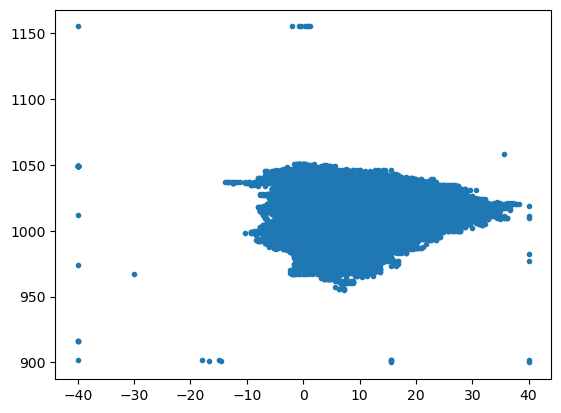

In [13]:
plt.scatter(*data.T, marker=".")
plt.show()


In [14]:
marks = np.array([45, 68, 56, 23, 60, 87, 75, 59, 63, 72])
bins = [20, 40, 60, 80, 100]


In [15]:
hist, binss = np.histogram(marks, bins)
hist, binss


(array([1, 3, 5, 1], dtype=int64), array([ 20,  40,  60,  80, 100]))

(array([1., 3., 5., 1.]),
 array([ 20.,  40.,  60.,  80., 100.]),
 <BarContainer object of 4 artists>)

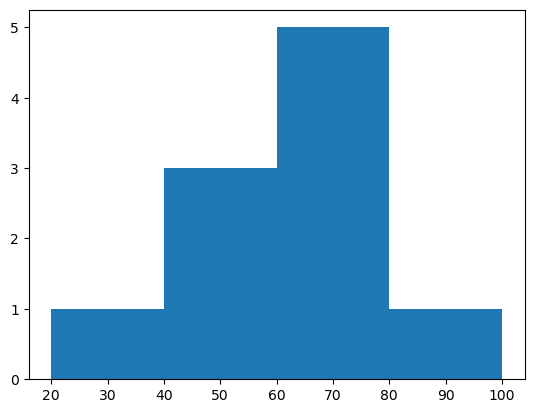

In [16]:
plt.hist(marks, bins)


In [17]:
bins[:-1]


[20, 40, 60, 80]

### P.3.2


<BarContainer object of 4 artists>

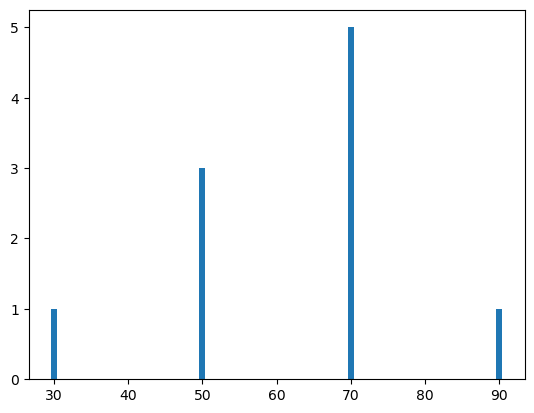

In [18]:
bins_new = (binss[:-1] + binss[1:]) / 2
plt.bar(bins_new, hist)


### P6.3.1


In [19]:
datal = np.genfromtxt("lottery-draws.txt", delimiter=" ", skip_header=2, dtype="i8")
index = np.add(np.where(datal[:, -1] == 0), 1)
datal_clean = np.delete(datal, index, 0)
index2 = np.where(datal_clean[:, -1] == 0)
datal_clean = np.delete(datal_clean, index2, 0)
# datal_clean
datal_avr = datal_clean[:, -1:]  # /datal_clean[:,-3:-2]
datal_count = datal_clean[:, 0:-2] < 13
datasum = datal_count.sum(axis=1)
np.corrcoef((datasum, datal_avr[:, -1]), rowvar=1)


array([[ 1.        , -0.19909853],
       [-0.19909853,  1.        ]])

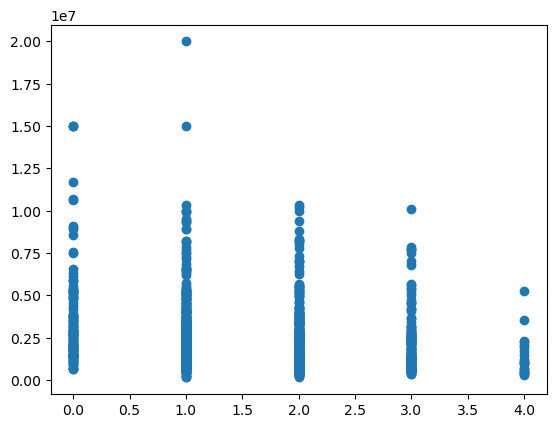

In [20]:
plt.scatter(datasum, datal_avr)


In [21]:
import sys


def parse_line(fi):
    # skip header rows
    fi.readline()
    fi.readline()
    rollover = False
    for line in fi:
        fields = line.split()
        nwinners = int(fields[6])
        if nwinners == 0:
            rollover = True
            continue
        if rollover:
            rollover = False
            continue
        balls = np.array([int(v) for v in fields[:6]])
        jackpot_share = float(fields[7])
        nlow = sum(balls < 13)
        yield nlow, jackpot_share


with open("lottery-draws.txt") as fi:
    datan = list(parse_line(fi))
datan = np.array(datan)

print(np.corrcoef(datan, rowvar=0))


[[ 1.         -0.19909853]
 [-0.19909853  1.        ]]


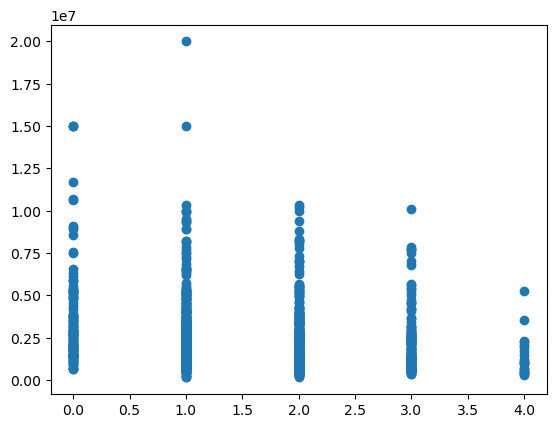

In [22]:
plt.scatter(datan[:, 0], datan[:, 1])


### P 6.3.3


In [23]:
height_male = np.loadtxt("ex6-3-f-male-heights.txt")
height_male = np.hstack(height_male)
height_male.mean(), height_male.std()


(178.7945, 10.82647956401341)

In [24]:
height_female = np.loadtxt("ex6-3-f-female-heights.txt")
height_female = np.hstack(height_female)
height_female.mean(), height_female.std()


(164.07979999999998, 7.3860200351745595)

(array([  0.,   3.,  26.,  79., 183., 237., 262., 145.,  52.,  11.,   2.,
          0.,   0.,   0.,   0.]),
 array([135., 140., 145., 150., 155., 160., 165., 170., 175., 180., 185.,
        190., 195., 200., 205., 210.]),
 <BarContainer object of 15 artists>)

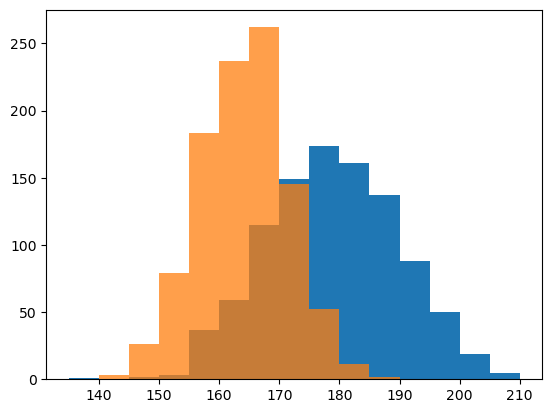

In [25]:
bins = np.linspace(135, 210, 16)
plt.hist(height_male, bins)
plt.hist(height_female, bins, alpha=0.75)


### Polynomials


In [26]:
from numpy.polynomial import Polynomial


In [27]:
p = Polynomial([6, -5, 1])


In [28]:
print(p)


6.0 - 5.0 x + 1.0 x**2


In [29]:
p


Polynomial([ 6., -5.,  1.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [30]:
p.coef


array([ 6., -5.,  1.])

In [31]:
p(4)


2.0

In [32]:
x = np.linspace(-5, 5, 11)
p(x)


array([56., 42., 30., 20., 12.,  6.,  2.,  0.,  0.,  2.,  6.])

In [33]:
p**2


Polynomial([ 36., -60.,  37., -10.,   1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [34]:
q = Polynomial([0, 0, 1, -2])


In [35]:
p * q


Polynomial([  0.,   0.,   6., -17.,  11.,  -2.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [36]:
p(q)


Polynomial([ 6.,  0., -5., 10.,  1., -4.,  4.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [37]:
p**2


Polynomial([ 36., -60.,  37., -10.,   1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [38]:
q**3


Polynomial([ 0.,  0.,  0.,  0.,  0.,  0.,  1., -6., 12., -8.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [39]:
p.roots()


array([2., 3.])

In [40]:
(q**3).roots()


array([0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.        +0.00000000e+00j, 0.        +0.00000000e+00j,
       0.49999677+0.00000000e+00j, 0.50000162-2.79933253e-06j,
       0.50000162+2.79933253e-06j])

In [41]:
Polynomial.fromroots([-4, 2, 1])


Polynomial([  8., -10.,   1.,   1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

### E 6.11


In [42]:
R = 1.5
F = 200 / 1000000
V0 = 4 / 3 * np.pi * R**3
T = V0 / F


In [43]:
c3, c2 = -np.pi / 3, np.pi * R
N = 100
time = np.linspace(0, T, N)
h = np.zeros(N)


In [44]:
for i, t in enumerate(time):
    c0 = F * t - V0
    pol = Polynomial([c0, 0, c2, c3])
    roots = pol.roots()
    h[i] = roots[(0 <= roots) & (roots <= 2 * R)][0]


C:\Users\cenkt\AppData\Local\Temp\ipykernel_11624\984722679.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  h[i] = roots[(0 <= roots) & (roots <= 2 * R)][0]


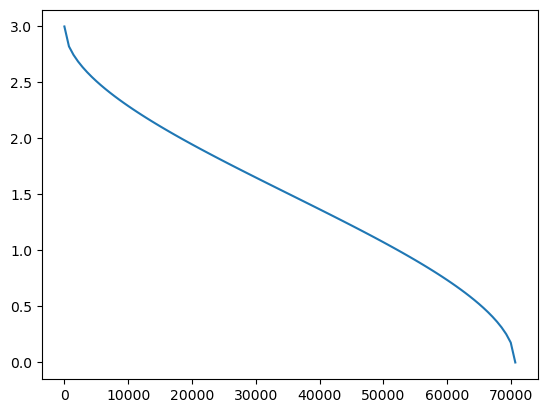

In [45]:
plt.plot(time, h)


### Q6.4.1


In [46]:
Polynomial((-7, 2, 0, 3)).deriv(3).coef[0] == 18


True

### Q 6.4.2


In [47]:
p1 = Polynomial([-11, 1, 1])
p2 = Polynomial([-7, 1, 1])
p3 = p1**2 + p2**2
p3dev = p3.deriv()
stationary_points = p3dev.roots()


In [48]:
p3dev2 = p3dev.deriv()
minima = stationary_points[p3dev2(stationary_points) > 0]
maxima = stationary_points[p3dev2(stationary_points) < 0]
maxima, minima


(array([-0.5]), array([-3.54138127,  2.54138127]))

### P 6.4.1


In [49]:
blast_data = np.loadtxt("new-mexico-blast-data.txt", skiprows=1)
blast_data[:, 0]


array([ 0.1 ,  0.24,  0.38,  0.52,  0.66,  0.8 ,  0.94,  1.08,  1.22,
        1.36,  1.5 ,  1.65,  1.79,  1.93,  3.26,  3.53,  3.8 ,  4.07,
        4.34,  4.61, 15.  , 25.  , 34.  , 53.  , 62.  ])

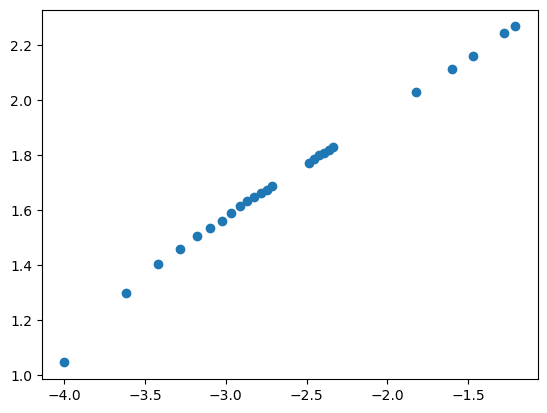

In [50]:
plt.scatter(np.log10(blast_data[:, 0] / 1000), np.log10(blast_data[:, 1]))


In [51]:
blast_pol = np.polyfit(np.log10(blast_data[:, 0] / 1000), np.log10(blast_data[:, 1]), deg=1)
print(blast_pol)


[0.40582263 2.77673621]


In [52]:
1.25 * 10 ** (blast_pol[1] * 5)


95629323414596.62

### P6.4.2


In [53]:
x1, y1, x2, y2, x3, y3, x4, y4 = np.loadtxt("./ex6-4-a-anscombe.txt", delimiter="\t", unpack=True)
x1, y1, x2, y2, x3, y3, x4, y4


(array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 8.04,  6.95,  7.58,  8.81,  8.33,  9.96,  7.24,  4.26, 10.84,
         4.82,  5.68]),
 array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1 , 6.13, 3.1 , 9.13, 7.26, 4.74]),
 array([10.,  8., 13.,  9., 11., 14.,  6.,  4., 12.,  7.,  5.]),
 array([ 7.46,  6.77, 12.74,  7.11,  7.81,  8.84,  6.08,  5.39,  8.15,
         6.42,  5.73]),
 array([ 8.,  8.,  8.,  8.,  8.,  8.,  8., 19.,  8.,  8.,  8.]),
 array([ 6.58,  5.76,  7.71,  8.84,  8.47,  7.04,  5.25, 12.5 ,  5.56,
         7.91,  6.89]))

In [54]:
np.mean(x1), np.mean(y1), np.var(x1), np.var(y1), np.corrcoef(x1, y1)


(9.0,
 7.500909090909093,
 10.0,
 3.7520628099173554,
 array([[1.        , 0.81642052],
        [0.81642052, 1.        ]]))

In [55]:
np.polyfit(x1, y1, deg=1)


array([0.50009091, 3.00009091])

### P6.4.4


In [56]:
saturn = Polynomial((2.198, 0.02842, 0.001061))


In [57]:
saturn


Polynomial([2.198e+00, 2.842e-02, 1.061e-03], domain=[-1,  1], window=[-1,  1], symbol='x')

In [58]:
print(saturn.integ(2)(2 * 60 + 15.2) / 1000)


61.33658216724479


In [59]:
c = np.array([1, 2j, 1 - 1j])
np.linalg.norm(c)


2.6457513110645907

In [60]:
abs(1 - 1j)  # abs -> z^2 = (x^2 +y^2)


1.4142135623730951

### E6.16

In [61]:
# Set up a Cartesian grid of points.
XMIN, XMAX, YMIN, YMAX = -3, 3, -3, 3
N = 16
xgrid = np.linspace(XMIN, XMAX, N)
ygrid = np.linspace(YMIN, YMAX, N)

grid = np.array(np.meshgrid(xgrid, ygrid)).reshape(2, N**2)
# Our untransformed unit basis vectors , i and j:
basis = np.array([[1, 0], [0, 1]])


def plot_quadrilateral(basis, color="g"):
    """Plot the quadrilateral defined by the two basis vectors."""
    ix, iy = basis[0]
    jx, jy = basis[1]
    plt.plot([0, ix, ix + jx, jx, 0], [0, iy, iy + jy, jy, 0], color)


def plot_vector(v, color="g", lw=1):
    """Plot vector v as a line with a specified color and linewidth."""
    plt.plot([0, v[0]], [0, v[1]], c=color, lw=lw)


def plot_points(grid, color="g"):
    """Plot the grid points in a specified color."""
    plt.scatter(*grid, c=color, s=2, alpha=0.5)


def apply_transformation(basis, T):
    """Return the transformed basis after applying transformation T."""
    return (T @ basis.T).T



[2. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


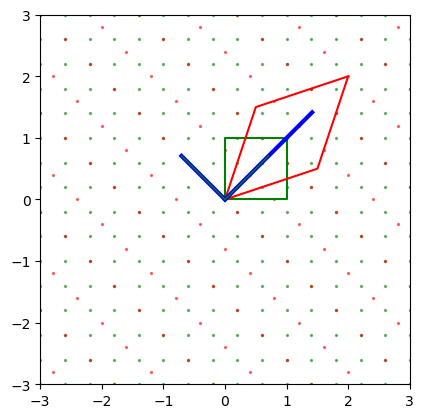

In [62]:

# The untransformed grid and unit square.
plot_points(grid)
plot_quadrilateral(basis)
# Apply the transformation matrix, S, to the scene.
S = np.array(((1.5, 0.5), (0.5, 1.5)))
tbasis = apply_transformation(basis, S)
plot_quadrilateral(tbasis, "r")
# plt.show()


tgrid = S @ grid
plot_points(tgrid, "r")
# plt.show()

# Find the eigenvalues and eigenvectors of S...
vals, vecs = np.linalg.eig(S)
print(vals, vecs)
if all(np.isreal(vals)):
    # ... if they ' re all real, indicate them on the diagram.
    v1, v2 = vals
    e1, e2 = vecs.T
    plot_vector(v1 * e1, "b", 3)
    plot_vector(v2 * e2, "b", 3)
    plot_vector(e1, "g")
    plot_vector(e2, "g")

# Ensure the plot has 1:1 aspect (i.e. squares look square) and set the limits.
plt.axis("square")
plt.xlim(XMIN, XMAX)
plt.ylim(YMIN, YMAX)
plt.show()